In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords

# IMPORTING file.

In [5]:
#%cd  "set your directory (location of files)"
data = pd.read_excel("BankReviews.xlsx")
data.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [3]:
x,y=data.Reviews,data.Stars

In [4]:
# corpus: corpus package automatically creates a set of corpus reader instances that can be used to access
# the corpora in the NLTK data package.
import re
corpus = []
for i in range(0, len(x)):
    review = re.sub(r'\W', ' ', str(x[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)

In [5]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [lemmatizer.lemmatize(word) for word in words]
    corpus[i] = ' '.join(words)

In [6]:
# Tf-Idf model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.8, stop_words = stopwords.words('english'))
x = vectorizer.fit_transform(corpus).toarray()

In [7]:
# dropping columns.
data.drop(['Date','BankName'],axis=1,inplace=True)

In [8]:
data.head()

,Stars,Reviews
0,5,"Great job, Wyndham Capital! Each person was pr..."
1,5,Matthew Richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...
3,5,We have been dealing with Brad Thomka from the...
4,5,I can't express how grateful I am for the supp...


SPLITING train 80% and test 20%

In [9]:

from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,
                                              y,
                                              test_size=.2,
                                              random_state=32)

MODEL for classificatiton problem

In [11]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit( train_x, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
#accuracy
from sklearn import metrics
test_accuracy=metrics.accuracy_score(test_y,log.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y,log.predict(train_x))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.8712871287128713
train_accuracy:  0.9331683168316832


Text(0.5, 15.0, 'Predicted value')

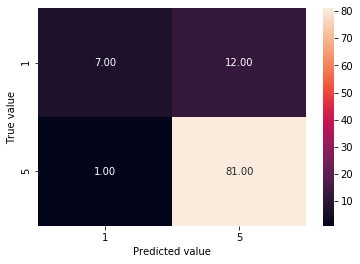

In [13]:
#confusion matrix for logistic model because there is no MSE.

from sklearn import metrics

matrix = metrics.confusion_matrix(test_y,
                            log.predict(test_x), [1,5] )
matrix

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(matrix, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True value')
plt.xlabel('Predicted value')

FOR 5 star rating model predicting with 81% accuracy.

In [14]:

#Concatenating final prediction with original data set(all obersvations):

pd_stars=pd.DataFrame(log.predict(x),columns=['pre_stars'])
  
file = pd.concat([data, pd_stars], axis=1)

file.head()

,Stars,Reviews,pre_stars
0,5,"Great job, Wyndham Capital! Each person was pr...",5
1,5,Matthew Richardson is professional and helpful...,5
2,5,We had a past experience with Wyndham Mortgage...,5
3,5,We have been dealing with Brad Thomka from the...,5
4,5,I can't express how grateful I am for the supp...,5


-------------------END